<a href="https://colab.research.google.com/github/iambusra/complingproject/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
!pip install pandas
!pip install xlsxwriter
!pip install openpyxl

import pandas as pd
import xlsxwriter
from google.colab import files
import io
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [117]:
# uploading the lexicon txt file which we will use for sentiment analysis via Files section on the left


In [118]:
# turning the file into a pandas data frame called lexicon

lexicon = pd.read_csv("Turkish-tr-NRC-VAD-Lexicon.txt", sep="\t", error_bad_lines=False)

In [119]:
# uploading news data called data_clean.xlsx via Files section on the left

In [120]:
# turning the file into a data frame called news
news = pd.read_excel("news_data.xlsx")

# removing the Başlıklar columns, which do not contain any data that need to be modeled
news = news.drop(["Başlıklar"], axis = 1)
print(news)

                                               Linkler  ... Bias
0    http://guneydogudanhaberler.com/elif-in-olumun...  ...  0.0
1                                 http://hbr.tk/mjSD2F  ...  0.0
2    http://manset67.com/haber/Aday-surucu-293-prom...  ...  1.0
3    http://manset67.com/haber/Alkollu-surucu-uygul...  ...  0.0
4                                 http://mill.yt/ibj0u  ...  0.0
..                                                 ...  ...  ...
624  https://www.trthaber.com/haber/turkiye/dur-iht...  ...  0.0
625  https://beyazgazete.com/haber/2021/6/27/viraji...  ...  0.0
626  https://m.sabah.com.tr/yasam/2021/06/11/kocael...  ...  0.0
627  https://www.haberturk.com/elazig-haberleri/880...  ...  0.0
628  http://gazetekartepe.net/alkollu-surucu-bariye...  ...  0.0

[629 rows x 3 columns]


In [121]:
news.describe()

,Bias
count,626.000000
mean,0.736422
std,0.935957
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [122]:
# there are duplicates in Linkler and Metinler column. Let's remove duplicates from the data
news = news.drop_duplicates(subset='Linkler')
news = news.drop_duplicates(subset='Metinler')

# Let's also drop NaN rows
news = news.dropna()
news.describe()

,Bias
count,573.000000
mean,0.750436
std,0.949155
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,3.000000


In [123]:
# preprocessing function that we have written in the class.
# We are using Turkish stop words this time since our data is in Turkish.

import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('turkish'))

def PreprocessNews(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  tokenized_text = nltk.word_tokenize(text)
  clean_text = [word for word in tokenized_text if word not in stopwords ]
  return(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [124]:
# preprocessing our news bodies
news['Metinler'] = news.apply(lambda x: PreprocessNews(x['Metinler']), axis=1)

# Assigning Sentiment Values to Tokens in the News Body

In [125]:
# create empty lists for saving sentiment values in the loop below
A = []
D = []
V =[]

# create variables with type int and value 0 so that we can add the sentiment values
# for each token to them and return the total sentiment values of a news body in the end.


# Look at the news body one by one (one row at a time).
# Then for the news body in that row, find sentiment value for each word.
# Add them up until moving onto the next news body in the next row.
for metin in news["Metinler"]:
  arousal = 0
  dominance = 0
  valence = 0
  for word in metin:
    if word in lexicon["Turkish-tr"].tolist():
      arousal += lexicon["Arousal"][lexicon["Turkish-tr"].tolist().index(word)]
      dominance += lexicon["Dominance"][lexicon["Turkish-tr"].tolist().index(word)]
      valence += lexicon["Valence"][lexicon["Turkish-tr"].tolist().index(word)]

  A.append(arousal)
  D.append(dominance)
  V.append(valence)



print(A)
print(D)
print(V)

[41.41399999999999, 11.063000000000002, 24.86300000000001, 7.718999999999999, 12.613999999999999, 12.008999999999999, 10.880999999999997, 14.533999999999997, 31.990000000000006, 18.076999999999998, 12.439, 36.636999999999986, 7.465999999999999, 82.191, 31.07000000000001, 15.505, 15.286999999999997, 15.088999999999995, 28.664, 12.734, 28.162999999999997, 30.86900000000001, 23.422, 12.635, 14.451999999999998, 8.657999999999998, 12.541, 18.584, 11.747, 18.637, 24.772000000000002, 19.226999999999997, 25.699, 3.1629999999999994, 41.41399999999999, 6.103, 4.945, 25.082, 12.652999999999999, 15.698999999999995, 12.613999999999999, 18.438, 16.923000000000002, 17.967000000000002, 3.6420000000000003, 1.568, 12.661999999999999, 15.549000000000001, 23.528, 15.594999999999999, 5.167999999999999, 11.063000000000002, 13.366999999999996, 19.991999999999997, 16.169999999999998, 17.389, 11.068000000000001, 17.74, 13.293000000000001, 15.698999999999995, 29.567, 19.865, 23.353, 18.843999999999994, 28.79800

In [126]:
# Check if the number of rows in the news match the number of items in the lists A, D, and V.
print(len(A))
print(len(D))
print(len(V))

# 573 rows.

573
573
573


In [127]:
# Let's append these lists with sentiment values to news data frame.
news["Arousal"] = A
news["Dominance"] = D
news["Valence"] = V
news.head()

,Linkler,Metinler,Bias,Arousal,Dominance,Valence
0,http://guneydogudanhaberler.com/elif-in-olumun...,"[karaköprü, mahallesinde, 26, ocak, günü, lise...",0.0,41.414,48.525,46.754
1,http://hbr.tk/mjSD2F,"[nevşehirde, dç, idaresindeki, 50, dc, 757, pl...",0.0,11.063,12.584,11.761
2,http://manset67.com/haber/Aday-surucu-293-prom...,"[zonguldak, ’, ın, ereğli, ilçesinde, polisin,...",1.0,24.863,27.176,25.528
3,http://manset67.com/haber/Alkollu-surucu-uygul...,"[zonguldak, ’, ın, ereğli, ilçesinde, polisin,...",0.0,7.719,6.945,6.391
4,http://mill.yt/ibj0u,"[kaza, dün, akşam, meşrutiyet, mahallesi, kadı...",0.0,12.614,13.604,14.850


In [128]:
# creating a list including number of matching tokens in each news body to be used in normalization
listed_tokens = []
for metin in news['Metinler']:
  news_listed_tokens = 0
  for word in metin:
    if word in lexicon["Turkish-tr"].tolist():
      news_listed_tokens += 1
  listed_tokens.append(news_listed_tokens)
print(listed_tokens)

[90, 22, 47, 14, 24, 22, 19, 30, 62, 30, 24, 72, 14, 144, 65, 31, 32, 31, 55, 27, 51, 59, 45, 22, 28, 19, 23, 38, 23, 34, 43, 38, 50, 6, 90, 12, 9, 54, 24, 32, 24, 33, 37, 38, 8, 3, 27, 30, 41, 33, 10, 22, 27, 39, 29, 29, 19, 34, 29, 32, 53, 39, 43, 37, 61, 134, 35, 29, 70, 35, 102, 21, 36, 196, 51, 16, 35, 41, 31, 36, 23, 33, 42, 29, 48, 42, 33, 24, 30, 7, 27, 33, 35, 26, 28, 21, 28, 28, 59, 25, 19, 16, 30, 16, 30, 145, 40, 28, 27, 93, 61, 37, 33, 8, 48, 24, 95, 14, 31, 20, 12, 17, 34, 21, 22, 69, 46, 48, 34, 28, 26, 18, 38, 95, 29, 30, 42, 59, 12, 20, 38, 27, 41, 26, 24, 33, 113, 63, 47, 32, 44, 22, 25, 17, 21, 28, 90, 33, 50, 17, 22, 21, 34, 15, 30, 30, 59, 17, 17, 29, 4, 25, 29, 116, 63, 47, 87, 36, 73, 62, 51, 38, 36, 61, 109, 65, 106, 137, 103, 16, 82, 72, 61, 44, 30, 52, 67, 50, 49, 84, 43, 65, 55, 37, 109, 104, 20, 51, 48, 37, 55, 51, 26, 37, 39, 44, 36, 27, 25, 23, 52, 24, 107, 35, 37, 48, 73, 25, 21, 26, 28, 14, 259, 23, 26, 41, 53, 44, 34, 55, 30, 38, 37, 37, 46, 22, 37, 31,

In [129]:
# creating a df with non-normalized values and token number obtained in the previous cell
token_df = pd.DataFrame(list(zip(news["Arousal"], news["Dominance"], news["Valence"], listed_tokens)), columns = ["Arousal", "Dominance", "Valence", "Listed Tokens"])

# creating empty lists to append normalized values
normalized_arousal = []
normalized_dominance = []
normalized_valence = []

# normalization
for i in range(len(news["Arousal"])):
  normalized_arousal.append(token_df["Arousal"][i]/token_df["Listed Tokens"][i])
  normalized_dominance.append(token_df["Dominance"][i]/token_df["Listed Tokens"][i])
  normalized_valence.append(token_df["Valence"][i]/token_df["Listed Tokens"][i])

print(normalized_arousal)
print(normalized_dominance)
print(normalized_valence)

[0.46015555555555543, 0.5028636363636365, 0.5290000000000002, 0.5513571428571428, 0.5255833333333333, 0.5458636363636363, 0.5726842105263156, 0.48446666666666655, 0.515967741935484, 0.6025666666666666, 0.5182916666666667, 0.508847222222222, 0.5332857142857143, 0.5707708333333333, 0.47800000000000015, 0.5001612903225807, 0.4777187499999999, 0.4867419354838708, 0.5211636363636364, 0.4716296296296296, 0.5522156862745098, 0.5232033898305086, 0.5204888888888889, 0.5743181818181818, 0.5161428571428571, 0.4556842105263157, 0.5452608695652174, 0.48905263157894735, 0.5107391304347826, 0.5481470588235294, 0.576093023255814, 0.5059736842105262, 0.51398, 0.5271666666666666, 0.46015555555555543, 0.5085833333333333, 0.5494444444444445, 0.4644814814814815, 0.5272083333333333, 0.49059374999999983, 0.5255833333333333, 0.5587272727272727, 0.4573783783783784, 0.47281578947368424, 0.45525000000000004, 0.5226666666666667, 0.4689629629629629, 0.5183000000000001, 0.5738536585365853, 0.47257575757575754, 0.51

In [130]:
# Let's append the normalized values to our news data frame.
news["Normalized Arousal"] = normalized_arousal
news["Normalized Dominance"] = normalized_dominance
news["Normalized Valence"] = normalized_valence
news[0:20]

,Linkler,Metinler,Bias,Arousal,Dominance,Valence,Normalized Arousal,Normalized Dominance,Normalized Valence
0,http://guneydogudanhaberler.com/elif-in-olumun...,"[karaköprü, mahallesinde, 26, ocak, günü, lise...",0.0,41.414,48.525,46.754,0.460156,0.539167,0.519489
1,http://hbr.tk/mjSD2F,"[nevşehirde, dç, idaresindeki, 50, dc, 757, pl...",0.0,11.063,12.584,11.761,0.502864,0.572000,0.534591
2,http://manset67.com/haber/Aday-surucu-293-prom...,"[zonguldak, ’, ın, ereğli, ilçesinde, polisin,...",1.0,24.863,27.176,25.528,0.529000,0.578213,0.543149
3,http://manset67.com/haber/Alkollu-surucu-uygul...,"[zonguldak, ’, ın, ereğli, ilçesinde, polisin,...",0.0,7.719,6.945,6.391,0.551357,0.496071,0.456500
4,http://mill.yt/ibj0u,"[kaza, dün, akşam, meşrutiyet, mahallesi, kadı...",0.0,12.614,13.604,14.850,0.525583,0.566833,0.618750
5,http://ow.ly/b5hM50F3sy9,"[ali, yalçınerin, kullandığı, otomobil, i̇zmir...",0.0,12.009,11.634,12.985,0.545864,0.528818,0.590227
6,http://ow.ly/IcOU50F2vIc,"[edinilen, bilgilere, göre, nevşehir, uçhisar,...",0.0,10.881,11.587,10.255,0.572684,0.609842,0.539737
7,http://sehirdebuhafta.com/haber/9958/beton-mik...,"[adıyaman, ’, alt, geçitten, geçtiği, esnada, ...",0.0,14.534,15.303,16.662,0.484467,0.510100,0.555400
8,http://www.adayorum.com/alkolltrafige-kapali-y...,"[sakarya, ’, nın, sapanca, ilçesinde, alkollü,...",1.0,31.990,33.127,33.244,0.515968,0.534306,0.536194
9,http://www.anhanews.com/gundem/dur-ihtarina-uy...,"[nevşehirde, polisin, ‘, dur, ’, ihtarına, uym...",0.0,18.077,18.584,15.451,0.602567,0.619467,0.515033


Seems good. Normalized values are between 0-1 as expected.

In [ ]:
# Now, since we do not have a lot of data for our model to learn how to classify
# news into 4 categories as in our data (0, 1, 2, 3), we decided to collapse the
# labels 0 and 1 to Not Biased (yok); labels 2 and 3 to Biased

labels = {0: "yok", 1:"yok", 2:"var", 3:"var"}

news['Bias'] = news.Bias.map(labels)

news[205:220]

In [132]:
labels = {"yok" : 0, "var": 1}

news['Bias'] = news.Bias.map(labels)

news[205:220]

,Linkler,Metinler,Bias,Arousal,Dominance,Valence,Normalized Arousal,Normalized Dominance,Normalized Valence
210,https://www.haberler.com/sisli-de-luks-araciyl...,"[şişlide, lüks, aracıyla, kaza, yapan, kadın, ...",1,49.976,55.890,63.988,0.480538,0.537404,0.615269
211,https://www.haberler.com/son-dakika-haberleri-...,"[sinem, kuran, 45, idaresindeki, 35, gb, 4539,...",0,10.911,11.136,10.705,0.545550,0.556800,0.535250
212,https://www.haberler.com/ukrayna-da-tramvay-yo...,"[ukraynada, tramvay, yoluna, park, eden, kadın...",1,22.553,26.275,30.047,0.442216,0.515196,0.589157
213,https://www.haberturk.com/adana-haberleri/8794...,"[adana, ’, polisin, ‘, dur, ’, ihtarına, uymay...",0,24.747,26.291,25.464,0.515562,0.547729,0.530500
214,https://www.haberturk.com/afyonkarahisar-haber...,"[afyonkarahisar, ’, ın, bolvadin, ilçesinde, k...",0,18.822,20.912,21.942,0.508703,0.565189,0.593027
215,https://www.haberturk.com/antalya-haberleri/69...,"[antalya, ’, nın, gazipaşa, ilçesinde, otomobi...",0,27.862,29.495,32.388,0.506582,0.536273,0.588873
216,https://www.haberturk.com/antalya-haberleri/87...,"[antalya, ’, direksiyon, hakimiyetini, kaybede...",0,24.997,26.046,25.694,0.490137,0.510706,0.503804
217,https://www.haberturk.com/antalya-haberleri/87...,"[antalya, ’, virajı, alamayarak, takla, atan, ...",0,11.642,13.155,16.255,0.447769,0.505962,0.625192
218,https://www.haberturk.com/antalya-haberleri/87...,"[antalya, ’, trafikte, çıkan, tartışmada, şehi...",0,17.944,17.936,19.116,0.484973,0.484757,0.516649
219,https://www.haberturk.com/antalya-haberleri/87...,"[antalyada, otomobilinin, direksiyon, hakimiye...",0,20.406,21.383,21.353,0.523231,0.548282,0.547513


In [133]:
# saving the data frame with all the information obtained so far
writer = pd.ExcelWriter('data_for_model.xlsx')
news.to_excel(writer)
writer.save()

In [134]:
# dropping NaNs if there is any in the newly added columns including normalized values
news = news[news['Normalized Arousal'].notna()]
print("Sum of NULL values in each column. ")
print(news.isnull().sum())

Sum of NULL values in each column. 
Linkler                 0
Metinler                0
Bias                    0
Arousal                 0
Dominance               0
Valence                 0
Normalized Arousal      0
Normalized Dominance    0
Normalized Valence      0
dtype: int64


In [135]:
news.describe

<bound method NDFrame.describe of                                                Linkler  ... Normalized Valence
0    http://guneydogudanhaberler.com/elif-in-olumun...  ...           0.519489
1                                 http://hbr.tk/mjSD2F  ...           0.534591
2    http://manset67.com/haber/Aday-surucu-293-prom...  ...           0.543149
3    http://manset67.com/haber/Alkollu-surucu-uygul...  ...           0.456500
4                                 http://mill.yt/ibj0u  ...           0.618750
..                                                 ...  ...                ...
622  https://www.milliyet.com.tr/gundem/bursada-fec...  ...           0.450839
625  https://beyazgazete.com/haber/2021/6/27/viraji...  ...           0.506222
626  https://m.sabah.com.tr/yasam/2021/06/11/kocael...  ...           0.518250
627  https://www.haberturk.com/elazig-haberleri/880...  ...           0.524630
628  http://gazetekartepe.net/alkollu-surucu-bariye...  ...           0.535431

[573 rows x 9 col

573 rows, 9 columns, as expected.

# Random Forest Classifier


In [136]:
# For the news data frame, we select only the columns we need for building a classifier.
# X includes our 3 predictors and y includes the predicted value (the category of the news as biased or neutral)
X = news[["Normalized Arousal", "Normalized Dominance", "Normalized Valence"]]
y = news["Bias"]

In [137]:
# We encode the outcome (biased/neutral) by numerical values for model's use
labelencoder_y = LabelEncoder()

# fit and transform the dependent variable (our outcome) y
y = labelencoder_y.fit_transform(y)

In [138]:
# Splitting the data into test and train dataset such that 70% of the data will be training dataset and 30%  test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [139]:
# Using the random forest classifier for the prediction
classifier=RandomForestClassifier(n_estimators=130)
classifier=classifier.fit(X_train,y_train)
predicted=classifier.predict(X_test)

In [140]:
# printing the results
print ('Accuracy Score :',accuracy_score(y_test, predicted))
print ('Report : ')
print (classification_report(y_test, predicted))

Accuracy Score : 0.8
Report : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        97
           1       0.14      0.06      0.08        18

    accuracy                           0.80       115
   macro avg       0.49      0.50      0.48       115
weighted avg       0.73      0.80      0.76       115



In [141]:
# this matrix shows model's correct prediction of labels with respect to the label.
print ('Confusion Matrix :')
cm = confusion_matrix(y_test, predicted)
cm

Confusion Matrix :


array([[91,  6],
       [17,  1]])

A finer illustration of this matrix is shown in the plot below.

Text(69.0, 0.5, 'Truth')

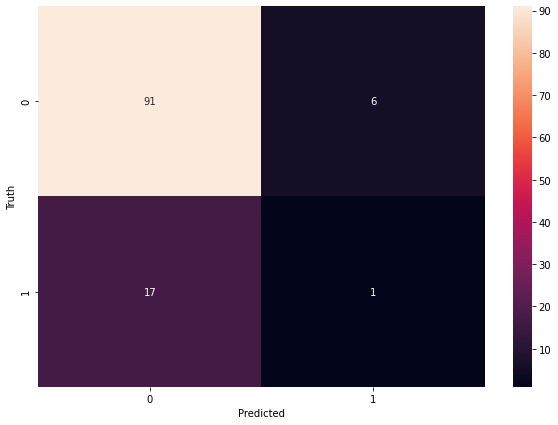

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Confusion matrix shows that out of 97 0-labelled news (neutral), the model could predict 91 correctly as 0. The remaining 6 were wrongly predicted to be 1 (biased). When it comes to Biased news in the test data, the model could predict only 1 out of 18 Biased pieces of news correctly. 17 were misclassified. This might mean that -since most of our data is neutral- the model overgeneralized to classify the news as neutral overall. Thus, it predicted 17 out of 18 biased news to be neutral.